In [2]:
#Common imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


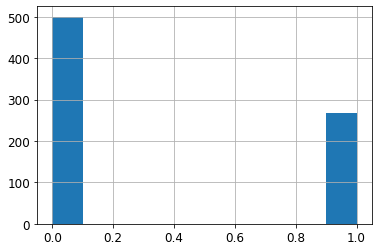

In [6]:
df.Outcome.hist()

In [7]:
X = df.drop("Outcome", axis = 1)
Y = df["Outcome"].to_numpy()
Y = np.where(Y == 0, -1, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

X_scaled = mmscaler.fit_transform(X)


In [9]:
X_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [9]:
type(Y)

numpy.ndarray

In [98]:
class Perceptron:
    
    def __init__ (self, niter, LR):
        
        self.niter = niter 
        self.LR = LR 
        
        
    def fit (self, x, y ):
        self.m = []
        accuracy = {}
        max_accuracy = 0
        
        self.weight = np.ones(1 + x.shape[1])
        
        for i in range(self.niter):
            m_count = 0
            for x_row , y_row in zip(x,y):
                updated_W = self.LR * (y_row - self.predict(x_row))
                self.weight[1:] += x_row * updated_W
                self.weight[0] += updated_W
                m_count += int(updated_W != 0.0)
            self.m.append(m_count)
            
            accuracy[i] = accuracy_score(self.predict_array(x), y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.weight[1:]
                chkptb = self.weight[0]
                
        self.weight[1:] = chkptw
        self.weight[0] = chkptb
                
            
        return self
                
                
                
                
    def predict(self, x):
        
        #percep = np.dot(self.weight[1:], x) + self.weight[0]
        
        return np.where(np.dot(self.weight[1:], x) + self.weight[0] >= 0.0 , 1, -1)
    
    def predict_array(self, x): 
        
        y = []
        
        for x1 in x:
            
            results = self.predict(x1)
            y.append(results)
            
        return np.array(y)
    
    def show_weights (self):
        
        print ("W", self.weight[1:])
        
        print("/n")
        
        print("bias", self.weight[0])
        
    

In [100]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import Perceptron
pred = Perceptron(6000, 0.00001)
# use cross_validation
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=100)
pred.fit(x_train, y_train)



In [101]:
predicted = pred.predict_array(x_test)

In [102]:
pred.show_weights()

W [ 0.02497647  0.10726704 -0.01713967 -0.03459455 -0.01637447  0.18696316
  0.06137853  0.00994467]
/n
bias -0.2796800000007167


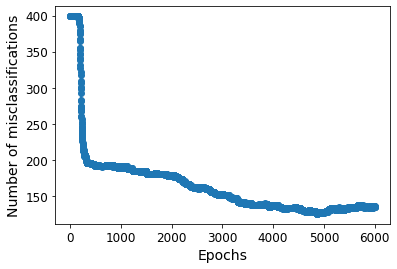

In [17]:
plt.plot(range(1, len(pred.m) + 1), pred.m, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [14]:

print('Accuracy score: ', accuracy_score(y_test, predicted))
print('Metrics Report')
print(classification_report(y_test, predicted))

Accuracy score:  0.7012987012987013
Metrics Report
              precision    recall  f1-score   support

          -1       0.79      0.74      0.77       101
           1       0.56      0.62      0.59        53

    accuracy                           0.70       154
   macro avg       0.67      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154



In [155]:
len(x_train)

614

In [210]:
import cvxpy as cp


n_samples = len(x_train)
d = x_train.shape[1]
n = x_train.shape[0]

W = cp.Variable((d+1))
#bias = cp.Variable()
epi = cp.Variable((n))
C = cp.Parameter()
C.value = 130

obj = cp.Minimize((1*cp.norm(W,2) + 1/n_samples*C*cp.sum(epi) ))


constranit_1 = [cp.multiply(y_train,(x_train@W[1:]+W[0])) >= (1-epi)]

constraint_2 = [epi >= 0]

constraints = constranit_1 + constraint_2

prob = cp.Problem(obj, constraints)

prob.solve()

print (prob.status)

w = W.value
#b = bias.value

optimal


In [211]:
w

array([-5.26485022,  1.16199015,  4.83190248, -0.81369621, -0.39204682,
        0.06746031,  3.2323634 ,  1.83135414,  0.77769527])

In [174]:
b

array(-1.)

In [75]:
    
def predict_array_svm(x, w, b): 
    
    y = []
        
    for x1 in x:
        results = np.where(np.dot(w, x1) + b >= 0.0 , 1, -1)
        y.append(results)
            
    return np.array(y)
        

In [212]:


y = []
        
for x1 in x_test:
    results = np.where(np.dot(w[1:], x1) + w[0] >= 0.0 , 1, -1)
    y.append(results)






#predicted_svm = predict_array_svm(x_test ,w, b)

print('Accuracy score: ', accuracy_score(y_test, y))
print('Metrics Report')
print(classification_report(y_test, y))

Accuracy score:  0.7272727272727273
Metrics Report
              precision    recall  f1-score   support

          -1       0.76      0.85      0.80       101
           1       0.63      0.49      0.55        53

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



In [213]:
y

[array(-1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(1),
 array(1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(1),
 array(1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(-1),
 array(1),
 array(-1),
 array(1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(1),
 array(1),
 array(-1),
 array(-1),
 array(-1),
 array(1),
 array(1),
 array(1),
 array(-1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 array(-1),
 ar